In [74]:
import pandas as pd

In [75]:
df = pd.read_csv('mof.csv')
df

,pld,surface_area_m2g,label
0,2.93515,18.4268,0
1,3.21360,613.2570,1
2,3.98810,258.3630,0
3,6.93817,365.9500,0
4,1.91197,247.3670,1
...,...,...,...
193,5.32598,241.8870,0
194,10.73000,602.5550,0
195,2.52259,25.6035,0
196,2.49261,11.6380,0


In [76]:
import numpy as np

In [77]:
np.min(df['pld']), np.max(df['pld'])

(0.86536, 11.4623)

In [78]:
np.min(df['surface_area_m2g']), np.max(df['surface_area_m2g'])

(0.969831, 2198.28)

In [79]:
x0 = df['pld']
x1 = df['surface_area_m2g']

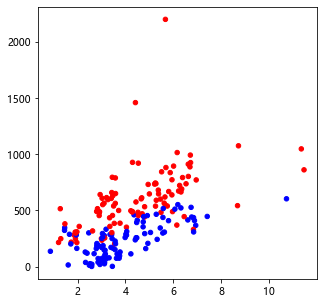

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(x0, x1, c = df['label'], cmap = 'bwr', s = 20)
plt.show()

In [81]:
X = df[['pld', 'surface_area_m2g']].values
y = df['label']

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X, y)

KNeighborsClassifier()

In [84]:
xx, yy = np.meshgrid(np.arange(0.0, 12.0, 0.1), np.arange(-100, 2300, 1))
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)

In [85]:
Z = clf_knn.predict(coords)
Z = Z.reshape(xx.shape)

In [86]:
from matplotlib.colors import ListedColormap

def plot_res(x0, x1, xx, yy, Z):
    light_rgb = ListedColormap(['#AAAAFF', '#FFAAAA'])
    plt.figure(figsize = (5, 5))
    plt.pcolormesh(xx, yy, Z, shading='auto', cmap = light_rgb)
    plt.scatter(x0,x1,c = df['label'], cmap = 'bwr', s=20)
    plt.show()

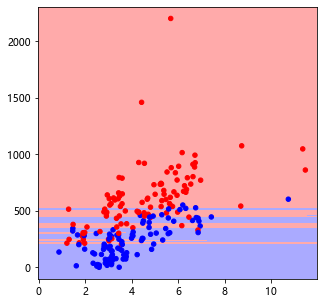

In [87]:
plot_res(x0, x1, xx, yy, Z)

# 标准化处理

In [88]:
from sklearn.preprocessing import StandardScaler #特征缩放，归一化处理

In [89]:
scaler0 = StandardScaler()
x_test = np.arange(4).reshape(-1, 1)
x_test

array([[0],
       [1],
       [2],
       [3]])

In [90]:
scaler0.fit(x_test)
x_test = scaler0.transform(x_test)
x_test

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [91]:
scaler = StandardScaler()

In [92]:
X_scaler = scaler.fit_transform(X) #x的两列相差太大，将x的均值化为0，方差为1
X_scaler

array([[-0.74015999, -1.41082006],
       [-0.58495847,  0.66012709],
       [-0.15327027, -0.5754637 ],
       [ 1.4910298 , -0.20089128],
       [-1.31045661, -0.61374712],
       [ 1.3954843 ,  0.05797442],
       [-0.78501766, -0.82836546],
       [ 0.08271742, -0.64839578],
       [ 1.16405595,  0.92574705],
       [ 0.61902522,  0.89156144],
       [-0.67493578,  0.44230223],
       [-0.79701798,  0.3168436 ],
       [-0.64444728,  0.48676545],
       [ 0.5505292 ,  1.11139518],
       [-0.70205215, -1.2757582 ],
       [-1.66327044,  0.31594535],
       [-0.27088789, -1.02386993],
       [-0.43887563, -0.90433695],
       [ 0.32689855, -0.91841645],
       [ 1.07452454,  0.44290106],
       [-0.62054139, -0.97074455],
       [-0.78355734, -1.34216371],
       [-0.75786785,  0.10409487],
       [-0.68715347, -1.21835709],
       [-0.40609073, -0.13786429],
       [ 0.69640581,  1.458397  ],
       [ 0.89657091,  1.43391803],
       [-0.13522799, -0.47101639],
       [ 1.09186453,

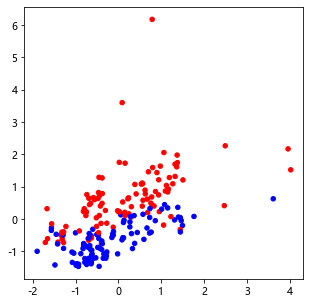

In [93]:
plt.figure(figsize = (5, 5))
plt.scatter(X_scaler[:,0], X_scaler[:,1], c = df['label'], cmap = 'bwr', s = 20)
plt.show()

In [94]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_scaler, y)

KNeighborsClassifier()

In [105]:
xx_s, yy_s = np.meshgrid(np.arange(-3, 5, 0.1), np.arange(-2, 7, 0.1))
coords_s = np.stack((xx_s.reshape(-1), yy_s.reshape(-1)), axis = 1)

In [106]:
Z_s = clf_knn.predict(coords_s)
Z_s = Z_s.reshape(xx_s.shape)

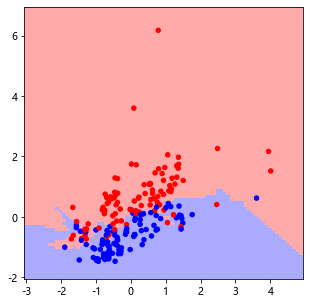

In [107]:
plot_res(X_scaler[:, 0], X_scaler[:, 1], xx_s, yy_s, Z_s)

# 支持向量机（support vector machines)

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

线性核函数linear

In [99]:
clf_svm = make_pipeline(StandardScaler(), SVC(kernel = 'linear')) #线性核函数
clf_svm.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [101]:
xx,yy = np.meshgrid(np.arange(0.0, 12.0, 0.1), np.arange(-100, 2300, 1))
coords = np.stack((xx.reshape(-1), yy.reshape(-1)), axis = 1)

In [102]:
Z = clf_svm.predict(coords)
Z = Z.reshape(xx.shape)

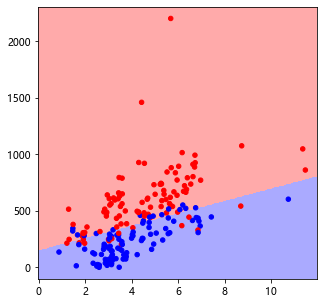

In [104]:
plot_res(x0, x1, xx, yy, Z)

rbf核函数

In [111]:
clf_svm_rbf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf')) #线性核函数
clf_svm_rbf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [114]:
Z_rbf = clf_svm_rbf.predict(coords)
Z_rbf = Z_rbf.reshape(xx.shape)

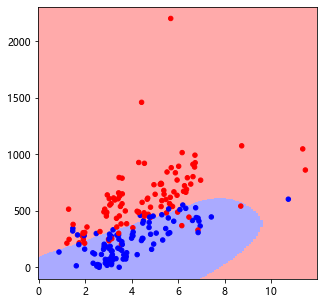

In [115]:
plot_res(x0, x1, xx, yy, Z_rbf)

# 分类算法评估

In [116]:
from sklearn.metrics import precision_score

In [117]:
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 1, 0, 1, 1]

In [118]:
precision_score(y_true, y_pred) #查准率

0.5

In [125]:
print(precision_score(y_true, y_pred, average = None))
print(precision_score(y_true, y_pred, average = 'macro')) #宏平均
print(precision_score(y_true, y_pred, average = 'micro')) #微平均
print(precision_score(y_true, y_pred, average = 'weighted')) #权重

[1.  0.5]
0.75
0.6666666666666666
0.8333333333333334


In [119]:
from sklearn.metrics import recall_score

In [120]:
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 1, 0, 1, 1]

In [121]:
recall_score(y_true, y_pred) #查全率

1.0

# PR曲线/查准率查全率曲线

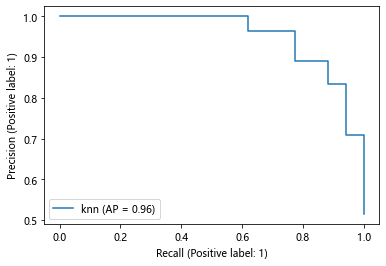

In [126]:
from sklearn.metrics import PrecisionRecallDisplay 

display = PrecisionRecallDisplay.from_estimator(clf_knn, X_scaler, y, name = 'knn')
plt.show()

In [129]:
y_score = clf_knn.predict_proba(scaler.transform(X))[:, 1]

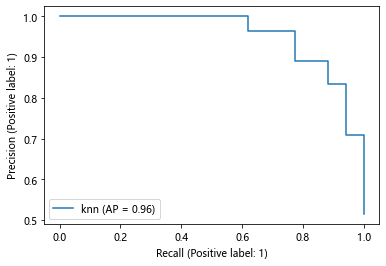

In [131]:
display = PrecisionRecallDisplay.from_predictions(y, y_score, name = 'knn')
plt.show()

In [132]:
from sklearn.metrics import precision_recall_curve

In [135]:
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y, clf_knn.predict_proba(scaler.transform(X))[:, 1])

In [136]:
precision_knn, recall_knn, thresholds_knn

(array([0.51515152, 0.70833333, 0.83478261, 0.89108911, 0.96341463,
        1.        , 1.        ]),
 array([1.        , 1.        , 0.94117647, 0.88235294, 0.7745098 ,
        0.61764706, 0.        ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

In [142]:
clf_svm3 = SVC(kernel = 'linear', probability = True)
clf_svm3.fit(X_scaler, y)

SVC(kernel='linear', probability=True)

In [143]:
precision_svm3, recall_svm3, thresholds_svm3 = precision_recall_curve(y, clf_svm3.predict_proba(X_scaler)[:, 1])

In [144]:
clf_svm4 = SVC(kernel = 'rbf', probability = True)
clf_svm4.fit(X_scaler, y)

SVC(probability=True)

In [145]:
precision_svm4, recall_svm4, thresholds_svm4 = precision_recall_curve(y, clf_svm4.predict_proba(X_scaler)[:, 1])

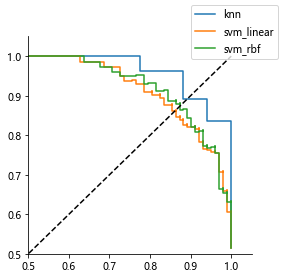

In [146]:
fig, ax = plt.subplots(figsize = (4, 4))

ax.step(recall_knn, precision_knn, label = 'knn')
ax.step(recall_svm3, precision_svm3, label = 'svm_linear')
ax.step(recall_svm4, precision_svm4, label = 'svm_rbf')
ax.plot([0,1],[0,1],'k--')
ax.set_xlim(0.5, 1.05)
ax.set_ylim(0.5, 1.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

plt.show()

In [138]:
from sklearn.metrics import f1_score

f1_score(y, clf_knn.predict(X_scaler))

0.8866995073891626

In [140]:
f1_score(y, clf_svm3.predict(X_scaler))

0.854368932038835

# 受试者工作特征（Receiver Operating Characteristic)曲线

In [148]:
from sklearn.metrics import roc_curve

fpr_knn, tpr_knn, threshold_knn = roc_curve(y, clf_knn.predict_proba(X_scaler)[:, 1], pos_label =1)

In [150]:
from sklearn.metrics import auc

roc_auc = auc(fpr_knn, tpr_knn)
roc_auc

0.9618055555555556

In [152]:
fpr_svm3, tpr_svm3, threshold_svm3 = roc_curve(y, clf_svm3.predict_proba(X_scaler)[:, 1], pos_label =1)

In [153]:
roc_auc = auc(fpr_svm3, tpr_svm3)
roc_auc

0.9441380718954249